In [109]:
# Install TensorFlow
#!pip install tensorflow

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Create Data

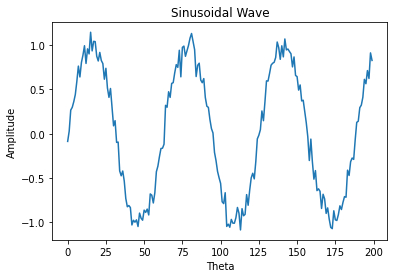

In [111]:
# make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.title("Sinusoidal Wave")
plt.xlabel("Theta")
plt.ylabel("Amplitude")
plt.show()

# Build Model

In [0]:
# let's see if we can use T past values to predict the next value
T = 10 # 10 previous time steps to predict the next time step
D = 1 # 1 numeric feature
X = []# Using fixed size numpy arrays would probably be better
Y = []

# Final target index: len(series) - 1
# Final t: len(series) - T - 1
# Final target index: Final t + T
# If we plug in value of little t ...
# Final target index: [len(series) - T - 1] + T
# Final target index: len(series) - 1
for t in range(len(series) - T): # 0 to len(series) - T - 1
  x = series[t:T+t] # t to t + T - 1
  X.append(x)
  y = series[t+T] # t + T
  Y.append(y)

X = np.array(X).reshape(-1, T, D) # N x T x D
Y = np.array(Y)
N = len(X)

X_train = X[:-N//2]
X_test = X[-N//2:]
Y_train = Y[:-N//2]
Y_test = Y[-N//2:]

In [0]:
i = Input(shape=(T, D))
x = SimpleRNN(8, activation='relu')(i)
x = Dense(1)(x)

model = Model(i, x)

model.compile(optimizer=Adam(lr=0.1),
              loss='mse')


In [114]:
print(model.summary())

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10, 1)]           0         
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 8)                 80        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________
None


In [115]:
r = model.fit(X_train, Y_train,
              validation_data = (X_test, Y_test),
              epochs=90)

Epoch 1/90
3/3 [==============================] - 0s 61ms/step - loss: 0.2424 - val_loss: 0.0469
Epoch 2/90
3/3 [==============================] - 0s 15ms/step - loss: 0.0506 - val_loss: 0.0288
Epoch 3/90
3/3 [==============================] - 0s 14ms/step - loss: 0.0668 - val_loss: 0.0245
Epoch 4/90
3/3 [==============================] - 0s 14ms/step - loss: 0.0369 - val_loss: 0.0256
Epoch 5/90
3/3 [==============================] - 0s 14ms/step - loss: 0.0343 - val_loss: 0.0361
Epoch 6/90
3/3 [==============================] - 0s 15ms/step - loss: 0.0310 - val_loss: 0.0303
Epoch 7/90
3/3 [==============================] - 0s 14ms/step - loss: 0.0313 - val_loss: 0.0328
Epoch 8/90
3/3 [==============================] - 0s 17ms/step - loss: 0.0291 - val_loss: 0.0257
Epoch 9/90
3/3 [==============================] - 0s 15ms/step - loss: 0.0246 - val_loss: 0.0232
Epoch 10/90
3/3 [==============================] - 0s 17ms/step - loss: 0.0239 - val_loss: 0.0235
Epoch 11/90
3/3 [============

# Evaluate Model

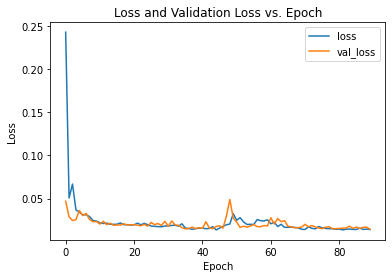

In [116]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.title("Loss and Validation Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

In [0]:
# Single step forecast (wrong way)
predictions_test = []
i = -N//2
while (len(predictions_test) < len(Y_test)):
  p = model.predict(X[i].reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

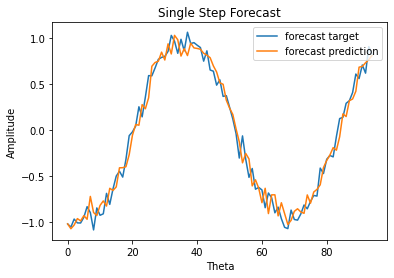

In [118]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Single Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()

In [0]:
# Multi step forecast - correct way - uses predictions for making future predictions
predictions_test = []

# Last train input
x_last = X[-N//2]

while (len(predictions_test) < len(Y_test)):
  p = model.predict(x_last.reshape(1, -1))[0,0]
  i += 1

  predictions_test.append(p)

  # Shift x_last vector of T values by 1 value to the left
  x_last = np.roll(x_last, -1)
  # Make last x_last element the prediction
  x_last[-1] = p

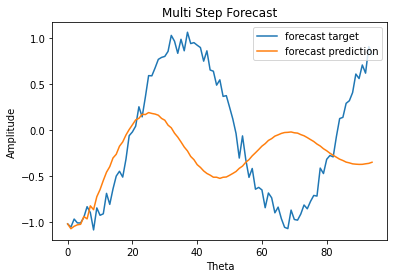

In [120]:
plt.plot(Y_test, label='forecast target')
plt.plot(predictions_test, label='forecast prediction')
plt.title("Multi Step Forecast")
plt.ylabel('Amplitude')
plt.xlabel('Theta')
plt.legend()
# It captures some periodicity, but predictions are still off